<a href="https://colab.research.google.com/github/hahajjjun/MLCompetition_Toy_Projects/blob/main/coinEM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Class coinEM
----------
Input : observation(*list of tuples(flips, heads)*), initial p_1, initial p_2 <br/>
Output : EM process logs

In [26]:
import math
import plotly
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [128]:
class coinEM:
  def __init__(self, obs, p_1, p_2, verbose = False): #p_1 corresponds to prob(Head|A), p_2 corresponds to prob(Head|B)
    self.obs = obs
    self.p_1 = p_1
    self.p_2 = p_2
    self.p_history = [[p_1,p_2]]
    self.verbose = verbose

  def Binomial(self, flips, heads, prob):
    tails = flips-heads
    return (prob**heads)*((1-prob)**(tails))

  def EM(self, verbose):

    # E-step
    z_table = {'A':[[],[]], 'B':[[],[]]}
    for trial in self.obs:
      F, H = trial #F : Flips, T : Tails, H : Heads
      T = F-H
      prob_1 = self.Binomial(F, H, self.p_1)
      prob_2 = self.Binomial(F, H, self.p_2)
      obs_prob = [prob_1/ (prob_1+prob_2), prob_2/ (prob_1+prob_2)] 
      z_table['A'][0].append(obs_prob[0]*H)
      z_table['A'][1].append(obs_prob[0]*T)
      z_table['B'][0].append(obs_prob[1]*H)
      z_table['B'][1].append(obs_prob[1]*T)

    if verbose:
      print("-"*10)
      print("iterating observation datas")
      z_table_dict = {}

      for key, value in z_table.items():  
        z_table_dict[key+'_H'] = value[0]
        z_table_dict[key+'_T'] = value[1]

      z_table_df = pd.DataFrame(z_table_dict)
      print(z_table_df)
    
    # M-step
    self.p_1 = sum(z_table['A'][0]) / (sum(z_table['A'][0]) + sum(z_table['A'][1]))
    self.p_2 = sum(z_table['B'][0]) / (sum(z_table['B'][0]) + sum(z_table['B'][1]))
    self.p_history.append([self.p_1, self.p_2])

    if verbose:
      print("current params : probability")
      print(f"p_1 : {self.p_1} \t p_2  : {self.p_2}")


  def run(self):
    iters = 1
    while True:
      previous_p_1 = self.p_1
      previous_p_2 = self.p_2
      if self.verbose:
        print(f"iteration #{iters}")
      iters += 1
      self.EM(verbose = self.verbose)
      if abs(previous_p_1-self.p_1) < 0.0005 and abs(previous_p_2-self.p_2) < 0.0005:
        if self.verbose:
          print("-"*10)
        print("EM process is finished")
        break
    
  def plot(self):
    fig, ax = plt.subplots(figsize = (8,8))
    p1_log, p2_log = zip(*self.p_history)
    temp = self.p_history[0][0], self.p_history[0][1]
    for logs in self.p_history:
      plt.plot(logs[0], logs[1], temp[0], temp[1], linestyle='dashed', marker = ".", linewidth=2)
      plt.text(logs[0]+0.0001, logs[1]+0.0001, f"{logs[0]:.3f},{logs[1]:.3f}")
      temp = logs[0], logs[1]

EM process is finished


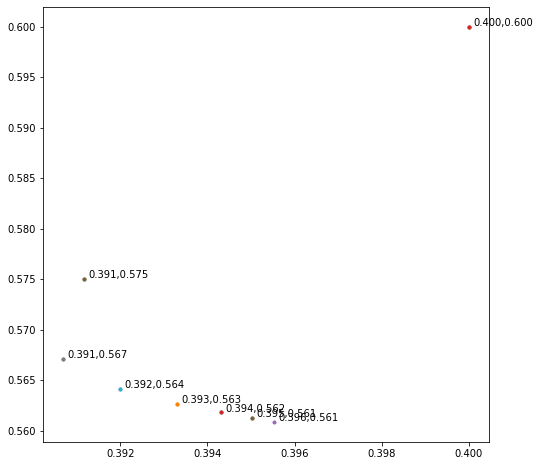

In [129]:
observation =  [(10,5), (10,4), (10,7), (10,6), (10,2)]
init_p1 = 0.4
init_p2 = 0.6
model = coinEM(observation, init_p1, init_p2, verbose = False)
model.run()
model.plot()